<a href='https://www.latos.ai'> <img src='../logo_latos.jpeg' style="width: 200px;" align="right"/></a>
*Esse notebook faz parte do curso de [Python e Ciência de Dados para a Indústria](https://www.latos.ai/academy/python-e-ciencia-de-dados) da [Latos Academy](https://www.latos.ai).*

Latos© copyright 2022. All Rights Reserved.


In [1]:
from pathlib import Path
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px 
import seaborn as sns
from sklearn import metrics
import pickle
from scipy.stats import kurtosis

my_figsize = (15, 8)

## Base de dados Wine Quality

Utilizando os dados já trabalhados nos exercícios da parte 3, vamos criar um modelo para classificar a qualidade do vinho a partir de outras variáveis.

Carregue a base de dados em winequality-red.csv.

In [2]:
root_dir = Path.cwd().parents[1]
data_dir = root_dir / 'data'

data_red = pd.read_csv(data_dir / 'winequality-red.csv', sep=';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Vamos simplificar a análise reduzindo o número de variáveis.

Baseado no que foi estudado até aqui, utilize a matriz de correlação calculada nos exercícios da parte 3 para selecionar 3 variáveis além da qualidade.

In [3]:
var1 = 'alcohol'
var2 = 'sulphates'
var3 = 'volatile acidity'


data_select = data_red[[var1, var2, var3, 'quality']]

Remova os outliers dos dados selecionados.

In [4]:
Q1 = data_select.quantile(0.25)
Q3 = data_select.quantile(0.75)
IQR = Q3 - Q1

data_clean = data_select[~((data_select < (Q1 - 1.5 * IQR)) | 
                           (data_select > (Q3 + 1.5 * IQR))).any(axis=1)]

In [5]:
data_clean

,alcohol,sulphates,volatile acidity,quality
0,9.4,0.56,0.700,5
1,9.8,0.68,0.880,5
2,9.8,0.65,0.760,5
3,9.8,0.58,0.280,6
4,9.4,0.56,0.700,5
...,...,...,...,...
1594,10.5,0.58,0.600,5
1595,11.2,0.76,0.550,6
1596,11.0,0.75,0.510,6
1597,10.2,0.71,0.645,5


Gere novamente o gráfico utilizando a função sns.pairplot() e compare os dados que foram removidos.

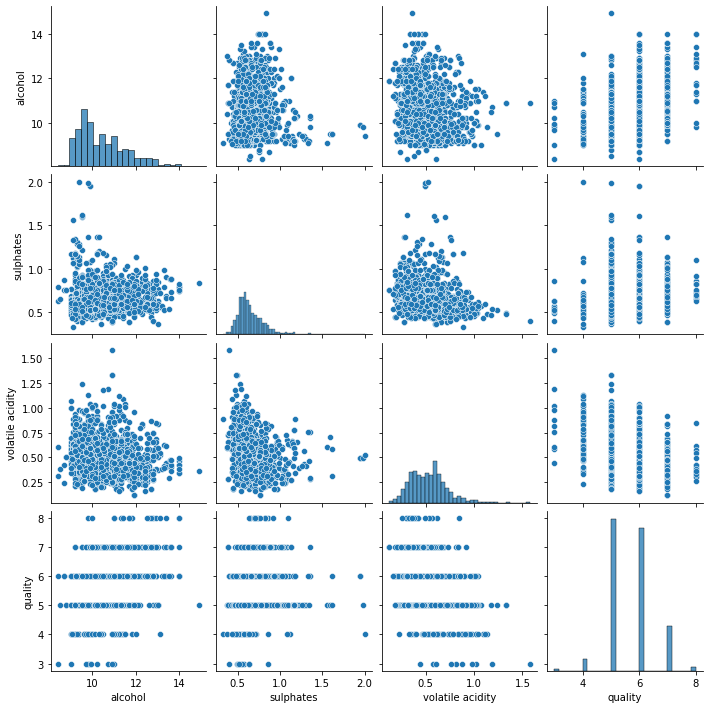

In [6]:
sns.pairplot(data_select)  # dados sem a remoção de outliers

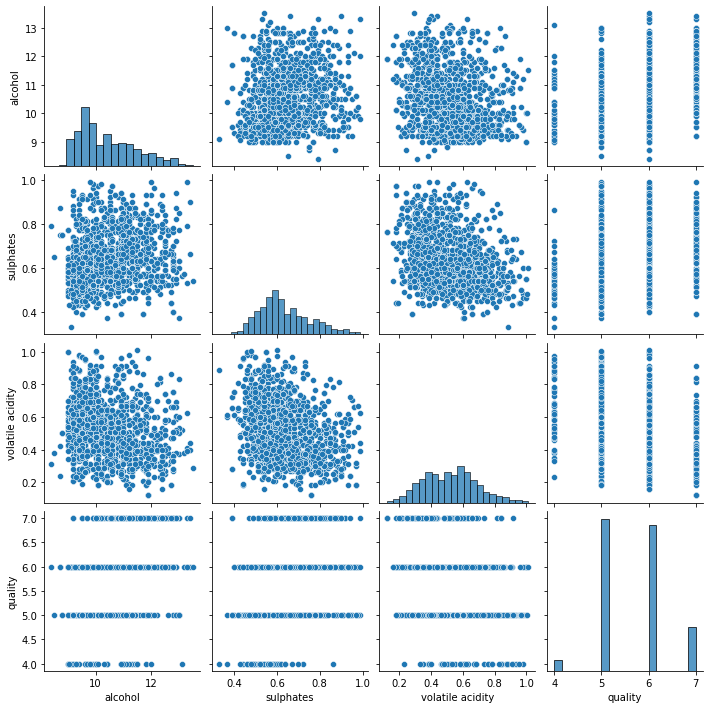

In [7]:
sns.pairplot(data_clean)  # dados com a remoção dos outliers

Escalone os dados para média igual nula e desvio padrão unitário.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_clean.iloc[:, :3])


X_scaled = scaler.transform(data_clean.iloc[:, :3])
X_scaled

array([[-0.98550112, -0.62893844,  1.06603771],
       [-0.59141559,  0.36956853,  2.15110093],
       [-0.59141559,  0.11994179,  1.42772545],
       ...,
       [ 0.59084099,  0.95203092, -0.07930681],
       [-0.19733006,  0.61919527,  0.73449061],
       [ 0.59084099,  0.2031507 , -1.28493262]])

Visualize os resultado do pré-processamento através dos gráficos box plot.

<AxesSubplot:>

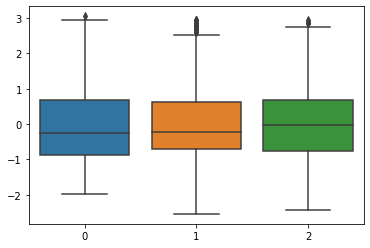

In [9]:
sns.boxplot(data=X_scaled)

Teste alguns modelos de Aprendizado de Máquina utilizando **classificação**.Siga os passos das aulas.

Simplificação: vamos dividir nossos dados em duas classes: ruim (notas iguais e menores que 6) e bom (notas maiores que 6)

* Qual foi a melhor acurária encontrada? 
* Você acredita que é suficiente para classificar a qualidade do vinho sem a ajuda de um humano? 
* Teste inserir mais variáveis no modelo para verificar se os modelos melhoram a acurácia.

In [10]:
y = data_clean['quality'].apply(lambda x: 0 if x <= 6 else 1)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1486, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, 
                                                    random_state=101)

In [12]:
# árvores de decisão
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=7)
dtree.fit(X_train, y_train)

y_pred_rf = dtree.predict(X_test)
dtree.score(X_test, y_test)

0.8340807174887892

In [13]:
# classificação utilizado florestas randômicas
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, random_state=44, 
                            bootstrap=False, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf.score(X_test, y_test)

0.8452914798206278

In [14]:
# inserir em um dataframe os dados de teste. 
# assim será possível verificar quais classificações deram errado.
# nesse caso escolhemos as features com maior importância no modelo

feature1 = 'alcohol'
feature2 = 'sulphates'
test_data = pd.DataFrame()
test_data[feature1] = data_clean[feature1][y_test.index]
test_data[feature2] = data_clean[feature2][y_test.index]
test_data["y_pred_rf"] = y_pred_rf
test_data["y_test"] = y_test.values

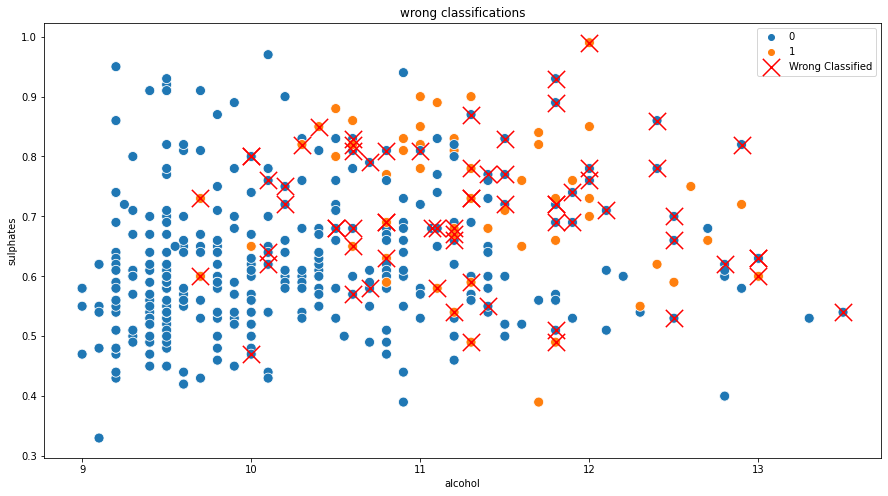

In [15]:
plt.figure(figsize=my_figsize)
# plota um scatter das features, distinguindo entre 0 e 1
sns.scatterplot(x=feature1, y=feature2, hue="y_test", data=test_data, s=100)
plt.title('wrong classifications')

# escolhe os index onde as predições deram errado no dataframe de teste
diff = np.where(y_pred_rf!=y_test)[0]

# faz o plot das predições que deram errado
plt.scatter(test_data.iloc[diff, 0], test_data.iloc[diff, 1],
            label="Wrong Classified", marker="x",
            color="Red", s=300)
plt.legend()
plt.show()

## Base de dados detecção da oscilação (difícil)

Carregue e base de dados oscillation.p

In [16]:
# carrega base de dados. Os dados estão salvos em Pickle, que permite salvar estruturas em Python, 
# nesse caso, dicionários
root_dir = Path.cwd().parents[1]
data_dir = root_dir / 'data'

X, info = pickle.load(open(data_dir / 'oscillation.p', 'rb'))

Os dados estão escalonados para média igual a zero e amplitude unitária. A amostragem é fixa e ideal para os dados. Vamos seguir as análises.

Para cada série temporal calcule as seguintes features: máximo, mínimo, desvio padrão, curtose e mediana. Cada série temporal gera uma linha em um DataFrame, onde as colunas são as features. 

In [17]:
for index in range(len(X)):
    info[index]['median'] = np.median(X[index])
    info[index]['min'] = np.max(X[index])
    info[index]['max'] = np.max(X[index])
    info[index]['std'] = np.std(X[index])
    info[index]['kurtosis'] = kurtosis(X[index])

In [18]:
data = pd.DataFrame.from_dict(info)
data

,osc,length,per,nper,waveform,smooth,dist,noise,freq_cg,fact,detect,median,min,max,std,kurtosis
0,0,2055,193.217218,10.635698,squ,0.003472,1.677390,0.067872,0.541796,0.495405,0,0.082062,0.420014,0.420014,0.302375,-1.365089
1,1,2795,59.948665,46.623223,tri,0.064703,4.657913,0.085207,1.093212,0.175640,1,0.027223,0.408919,0.408919,0.177527,-0.234547
2,1,2551,41.236895,61.862078,sin,0.166617,1.117795,0.024588,0.505549,0.465213,1,0.002122,0.522356,0.522356,0.220881,-0.621958
3,0,515,67.266680,7.656094,tri,0.056850,2.015757,0.090744,0.952671,0.451777,0,-0.095078,0.667790,0.667790,0.255338,-0.173085
4,2,2269,14.918784,152.090142,sin,0.363574,0.187437,0.109840,0.540970,0.644362,2,-0.000488,0.534312,0.534312,0.191754,-0.941585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,826,8.375548,98.620417,sin,0.141140,0.276572,0.078783,0.884505,0.661332,1,-0.004542,0.499663,0.499663,0.245672,-1.256190
9996,0,3059,141.428607,21.629288,tri,0.269975,0.524540,0.032134,0.506947,1.477876,0,0.067308,0.473389,0.473389,0.228684,-1.083268
9997,2,2248,27.407852,82.020291,squ,0.908394,0.156327,0.121352,0.753515,0.667713,2,-0.000442,0.524607,0.524607,0.175912,-0.509617
9998,0,205,34.909222,5.872374,squ,0.053400,0.902178,0.142248,0.637683,0.706785,0,-0.084222,0.635925,0.635925,0.221749,0.199801


Com o DataFrame, treine alguns modelos para classificar as série temporal em:
* 0 - sem oscilação
* 1 - oscilação regular
* 2 - oscilação irregular

Baseado nos resultados:
* Qual foi a melhor acurária encontrada? 
* Quais ações poderiam ser tomadas para melhorar a acurária?

In [19]:
from sklearn.model_selection import train_test_split
X = data[['median', 'max', 'min', 'std', 'kurtosis']]
y = data['osc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101)

In [20]:
# árvores de decisão
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=7)
dtree.fit(X_train, y_train)

y_pred_rf = dtree.predict(X_test)
dtree.score(X_test, y_test)

0.59

In [21]:
# classificação utilizado florestas randômicas
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, random_state=44,
                            bootstrap = False, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf.score(X_test, y_test)

0.6